# General overview on data and structure
General comment: If the number of rows to be dropped due to inconsistencies or NaN values is relatively small in comparson to the overall dataset than the rows will be rather dropped and no other means will be taken e.g. imputation.

In [627]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import random

In [628]:
# Adjust settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

In [629]:
# Load preprocessed dataset

data_path = '../data/interim/'
df = pd.read_pickle(os.path.join(data_path, 'preprocessed.pkl'))

In [630]:
# Initial look on pre-processed data set
df.head()

,flt_leg,flt_carrier,flt_fnum,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_mingt,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_leg,gnd_sched_tat,gnd_catering_dur,gnd_clean_dur,gnd_board_dur,arr_delay
0,272005011,East Carmen Airlines,EC3098,North Gregory,East Carmen,2019-06-01 00:43:00,2019-06-01 04:12:00,ECLBSX,other problem,3.0,320,0.0,0.0,Start,"['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...",[],235.0,268.0,2019-06-01 00:40:00,2019-06-01 04:30:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-18.0
1,272009188,East Carmen Airlines,EC3146,Port Bobby,East Carmen,2019-06-01 01:58:00,2019-06-01 03:40:00,ECLWHX,no reason,-7.0,E95,0.0,0.0,Start,"['Scott Baker_nan_nan_nan_cp', 'Ruth Hoffman_n...",[],130.0,189.0,2019-06-01 02:05:00,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-20.0
2,271984537,East Carmen Airlines,EC2840,Port Ryan,East Carmen,2019-06-01 02:24:00,2019-06-01 03:57:00,ECLGLX,other problem,4.0,DH4,0.0,0.0,Start,"['Cory Cooper_nan_nan_nan_ca', 'Morgan Foster_...",[],185.0,196.0,2019-06-01 02:20:00,2019-06-01 03:50:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7.0
3,272025831,East Carmen Airlines,EC3306,Coleland,East Carmen,2019-06-01 02:28:00,2019-06-01 03:49:00,ECLBMX,other problem,3.0,320,0.0,0.0,Start,"['Anne Davis_nan_nan_nan_ca', 'Miss Amanda Har...",[],145.0,175.0,2019-06-01 02:25:00,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-11.0
4,272006092,East Carmen Airlines,EC3114,East Melissaberg,East Carmen,2019-06-01 03:02:00,2019-06-01 04:43:00,ECLGNX,other problem,32.0,DH4,0.0,0.0,Start,"['Renee Fisher_nan_nan_nan_ca', 'Rebecca Castr...",[],35.0,21.0,2019-06-01 02:30:00,2019-06-01 04:15:00,DH4,ECLGNX,NaN,East Melissaberg,East Carmen,2019-06-01 02:30:00,2019-06-01 04:15:00,272006092.0,NaN,NaN,NaN,NaN,28.0


In [631]:
# Indicate share and total number of missing data per variable
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(28)


,Total,Percent
gnd_clean_dur,12027,0.999751
gnd_board_dur,8299,0.689859
gnd_catering_dur,7908,0.657357
gnd_sched_tat,7908,0.657357
gnd_mingt,7908,0.657357
gnd_arr_airpt,3764,0.312884
gnd_leg,3763,0.312801
gnd_sched_arr,3763,0.312801
gnd_sched_dep,3763,0.312801
gnd_dep_airpt,3763,0.312801


In [632]:
# Drop all rows with more than 50% missing values
df.drop(['gnd_mingt', 'gnd_catering_dur', 'gnd_clean_dur', 'gnd_board_dur'], axis=1, inplace=True)
# Drop rows with missing dependent variable
df.dropna(subset=['arr_delay'], inplace=True)
# Drop additional duplicates if there are new ones due to dropped columns
df.drop_duplicates(inplace=True, ignore_index=True)

# Univariate data exploration

In [633]:
# Explore flt_leg
df['flt_leg'].describe()

count         11934
unique        11896
top       272088104
freq              2
Name: flt_leg, dtype: int64

In [634]:
# Compare flt_leg and gnd_leg if available
df[df.gnd_leg.notna() & (df['flt_leg'].astype(object) != df['gnd_leg'].astype(object))]

,flt_leg,flt_carrier,flt_fnum,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_leg,gnd_sched_tat,arr_delay


In [635]:
# Identify duplicates in flt_leg and drop them; drop gnd_leg as well as there is no additional information
dup_flt_leg = df[df.duplicated(['flt_leg'], keep=False)]
dup_flt_leg.to_csv('../data/interim/dup_flt_leg.csv')
df.drop_duplicates(subset='flt_leg', inplace=True, ignore_index=True)
df = df.drop(columns='gnd_leg')

In [636]:
# Explore flt_carrier
df['flt_carrier'].value_counts()

East Carmen Airlines    11896
Name: flt_carrier, dtype: int64

In [637]:
# Drop flt_carrier as there is no information in this column
df = df.drop(columns='flt_carrier')

In [638]:
# Find all unique routings as combinations of fn_number, dep_ap_sched & arr_ap_sched
# Assumption that there is only one valid routing per fn_numberdf['flt_carrier'].describe()
routing = df[['flt_fnum', 'flt_dep_airpt', 'flt_arr_airpt']].value_counts().reset_index(name='count')
dup_fnnum = routing[routing.duplicated(['flt_fnum'], keep=False)]
print(dup_fnnum.sort_values(by='flt_fnum', ascending=True))

    flt_fnum     flt_dep_airpt       flt_arr_airpt  count
478  EC11525  East Allisontown           Aaronbury      5
479  EC11525         Aaronbury  North Stephenville      5
581  EC11859       East Carmen      New Stacyburgh      2
553  EC11859       East Carmen        East Michael      4
453  EC11860    New Stacyburgh         East Carmen      6
508  EC11860      East Michael      New Stacyburgh      5
562  EC11860    New Stacyburgh        East Michael      3
558  EC11860      East Michael         East Carmen      3
584  EC11869       East Carmen      South Victoria      1
607  EC11869       East Carmen           Jamesview      1
602   EC3027          West Ana         East Carmen      1
140   EC3027       East Carmen         Gilbertland     30
191   EC3117       East Carmen           Dudleyton     29
627   EC3117     Lake Joelbury         East Carmen      1
619   EC3292   South Nathaniel         East Carmen      1
220   EC3292       New Jessica         East Carmen     29
533   EC4498  

In [639]:
# Drop flt_fnum as all information is contained in the routing itself and flight number seem to be not consistent
df = df.drop(columns='flt_fnum')

In [640]:
# Compare flt_dep_airpt and gnd_dep_airpt if available
df[df.flt_dep_airpt.notna() & df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay
4563,271986377,Kennethfort,East Carmen,2019-06-12 13:37:00,2019-06-12 15:16:00,ECLBRX,other problem,2.0,320,23.0,45.0,A,"['Paul Bryant_182_23_45_ca', 'Shannon Schmidt_...",[],460.0,479.0,2019-06-12 13:35:00,2019-06-12 15:35:00,320,ECLBRX,South Haileyberg,East Carmen,2019-06-12 13:35:00,2019-06-12 15:35:00,-120.0,-19.0
4767,271994246,East Holly,East Carmen,2019-06-13 05:14:00,2019-06-13 06:14:00,ECLWMX,no reason,-11.0,E95,0.0,0.0,Start,"['Laura Marshall_nan_nan_nan_cp', 'Matthew Cur...",[],135.0,161.0,2019-06-13 05:25:00,2019-06-13 06:30:00,E95,ECLWMX,Paulbury,East Carmen,2019-06-13 05:25:00,2019-06-13 06:30:00,-65.0,-16.0
7691,271968559,West Jason,East Carmen,2019-06-20 09:01:00,2019-06-20 10:13:00,ECLXDX,other problem,1.0,320,4.0,45.0,A,"['Lynn Murphy_88_4_45_cp', 'Linda Watts_88_4_4...",[],85.0,92.0,2019-06-20 09:00:00,2019-06-20 10:20:00,320,ECLXDX,Kennethfort,East Carmen,2019-06-20 09:00:00,2019-06-20 10:20:00,-120.0,-7.0


In [641]:
# Delete rows with missmatching dep_airpt and drop gnd_dep_airpt as there is no additional information in comparison to flt_dep_arpt
dep_mismatch = df[df.flt_dep_airpt.notna() & df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))]
dep_mismatch.to_csv('../data/interim/dep_mismatch.csv')
df = df.drop(df[df.flt_dep_airpt.notna() & df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))].index)
df = df.drop(columns='gnd_dep_airpt')

In [642]:
# Compare flt_dep_airpt and gnd_dep_airpt if available
arr_mismatch = df[df.flt_arr_airpt.notna() & df.gnd_arr_airpt.notna() & (df['flt_arr_airpt'].astype(str) != df['gnd_arr_airpt'].astype(str))]
arr_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay
4287,271970762,East Carmen,West Jason,2019-06-11 19:13:00,2019-06-11 20:49:00,ECLBMX,other problem,13.0,320,28.0,50.0,A,"['Jackie Black_340_28_50_ca', 'Mark Anderson_3...","['ca', 'cp', 'cp', 'ca', 'ca']",NaN,NaN,2019-06-11 19:00:00,2019-06-11 20:20:00,320,ECLBMX,Susanmouth,2019-06-11 19:00:00,2019-06-11 20:20:00,50.0,29.0


In [643]:
# Delete rows with missmatching dep_airpt and drop gnd_dep_airpt as there is no additional information in comparison to flt_dep_arpt
arr_mismatch.to_csv('../data/interim/arr_mismatch.csv')
df = df.drop(df[df.flt_arr_airpt.notna() & df.gnd_arr_airpt.notna() & (df['flt_arr_airpt'].astype(str) != df['gnd_arr_airpt'].astype(str))].index)
df = df.drop(columns='gnd_arr_airpt')

In [644]:
# Explore flt_offblock 
df['flt_offblock'].describe() 

count                   11892
unique                   9657
top       2019-06-25 08:35:00
freq                        6
first     2019-06-01 00:43:00
last      2019-06-30 23:19:00
Name: flt_offblock, dtype: object

In [645]:
# Explore flt_onblock 
df['flt_onblock'].describe()

count                   11892
unique                   9801
top       2019-06-28 09:52:00
freq                        5
first     2019-06-01 03:40:00
last      2019-07-01 04:01:00
Name: flt_onblock, dtype: object

In [646]:
# Check mismatches in AC registration between flight data and ground data
ac_reg_mismatch = df[df.gnd_ac_reg.notna() & (df['flt_ac_reg'].astype(str) != df['gnd_ac_reg'].astype(str))]
ac_reg_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay


In [647]:
# Drop gnd_ac_reg as all information is already contained in flt_ac_reg
df = df.drop(columns='gnd_ac_reg')

In [648]:
# Explore flt_change_code
df['flt_change_code'].value_counts(dropna=False)

other problem         7399
technical problem     2032
rotational problem    1595
no reason              866
Name: flt_change_code, dtype: int64

count    11892.000000
mean        25.865624
std         25.685488
min        -14.000000
25%         10.000000
50%         17.000000
75%         35.000000
max        476.000000
Name: flt_dep_delay, dtype: float64


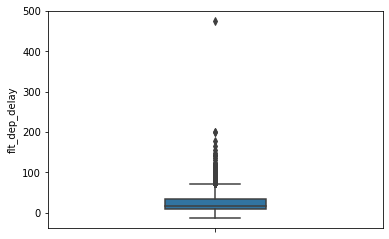

In [649]:
# Explore flt_dep_delay
print(df['flt_dep_delay'].describe())
sns.boxplot(y=df['flt_dep_delay'], width=0.3);
plt.show()

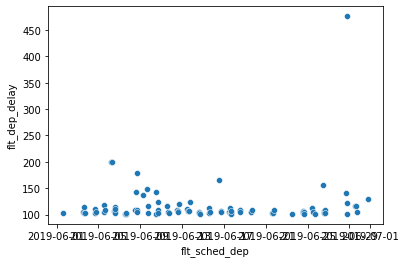

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay
269,272088536,East Elizabethside,East Carmen,2019-06-01 17:17:00,2019-06-01 19:05:00,ECLBPX,technical problem,102.0,320,45.0,45.0,A,"['Felicia Oneal_210_45_45_ca', 'Jennifer Garci...",[],50.0,-27.0,2019-06-01 15:35:00,2019-06-01 17:30:00,320,2019-06-01 15:35:00,2019-06-01 17:30:00,NaN,95.0
961,272023337,Lake Williammouth,East Carmen,2019-06-03 14:44:00,2019-06-03 16:35:00,ECLBLX,technical problem,104.0,320,38.0,40.0,A,"['Ryan Hubbard_174_38_40_ca', 'Samantha Mcguir...",[],15.0,30.0,2019-06-03 13:00:00,2019-06-03 14:55:00,320,2019-06-03 13:00:00,2019-06-03 14:55:00,NaN,100.0
1006,271957783,East Carmen,Lake Lawrencechester,2019-06-03 17:05:00,2019-06-03 18:23:00,ECLBLX,technical problem,115.0,320,185.0,180.0,C,"['Joyce Bishop_nan_nan_nan_ca', 'Tony Myers_na...","['ca', 'cp', 'cp', 'ca']",70.0,-33.0,2019-06-03 15:10:00,2019-06-03 16:40:00,320,2019-06-03 15:10:00,2019-06-03 16:40:00,15.0,103.0
1017,271967327,East Carmen,Lake Danielburgh,2019-06-03 17:07:00,2019-06-03 18:16:00,ECLGQX,technical problem,102.0,DH4,47.0,65.0,A,"['Shane Thompson_241_47_65_ca', 'Lauren Martin...","['ca', 'ca', 'cp']",35.0,-53.0,2019-06-03 15:25:00,2019-06-03 16:45:00,DHX,2019-06-03 15:25:00,2019-06-03 16:45:00,65.0,91.0
1056,272012347,Lake Kevin,East Carmen,2019-06-03 18:27:00,2019-06-03 19:08:00,ECLGRX,technical problem,102.0,DH4,24.0,40.0,A,"['Gerald Davis DDS_278_24_40_cp', 'Monica Ford...",[],40.0,-37.0,2019-06-03 16:45:00,2019-06-03 17:35:00,DHX,2019-06-03 16:45:00,2019-06-03 17:35:00,NaN,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11106,272011137,North Anna,East Carmen,2019-06-29 03:16:00,2019-06-29 03:57:00,ECLGBX,other problem,476.0,DH4,15.0,30.0,A,"['Destiny Sanchez_355_15_30_cp', 'Cynthia John...",[],65.0,-383.0,2019-06-28 19:20:00,2019-06-28 20:10:00,DH4,2019-06-28 19:20:00,2019-06-28 20:10:00,NaN,467.0
11339,272211696,Maryland,East Carmen,2019-06-29 14:51:00,2019-06-29 16:10:00,ECLGRX,technical problem,116.0,DH4,25.0,35.0,A,"['Tina Fisher_179_25_35_ca', 'Catherine Rojas_...",[],45.0,56.0,2019-06-29 12:55:00,2019-06-29 14:25:00,DHX,2019-06-29 12:55:00,2019-06-29 14:25:00,NaN,105.0
11392,272031980,East Carmen,Lake Richardberg,2019-06-29 17:06:00,2019-06-29 17:50:00,ECLGRX,technical problem,116.0,DH4,42.0,50.0,C,"['John Hardin_nan_nan_nan_cp', 'Brian Gonzalez...","['ca', 'cp']",30.0,24.0,2019-06-29 15:10:00,2019-06-29 16:00:00,DHX,2019-06-29 15:10:00,2019-06-29 16:00:00,45.0,110.0
11426,272032188,Lake Richardberg,East Carmen,2019-06-29 18:14:00,2019-06-29 19:07:00,ECLGRX,technical problem,104.0,DH4,32.0,30.0,A,"['John Hardin_264_32_30_cp', 'Renee Fisher_nan...",['cp'],65.0,-14.0,2019-06-29 16:30:00,2019-06-29 17:25:00,NaN,NaT,NaT,NaN,102.0


In [650]:
# Identification of the outlier, storing it to a csv file and dropping it from the dataframe
outlier_dep_delay = df[(df['flt_dep_delay'] > 100)]
outlier_dep_delay.to_csv('../data/interim/outlier.csv')
#df = df.drop(index=outlier_dep_delay.index)
sns.scatterplot(x='flt_sched_dep', y='flt_dep_delay', data=outlier_dep_delay);
plt.show()
outlier_dep_delay

#df[df['flt_ac_reg'] == 'ECLGBX']

In [651]:
# Explore flt_ac_type
df.flt_ac_type.value_counts(dropna=False)

320    5990
E95    3230
DH4    2672
Name: flt_ac_type, dtype: int64

In [652]:
# Explore gnd_ac_type
df.gnd_ac_type.value_counts(dropna=False)

NaN    3657
320    2952
E95    2179
DH4    1165
319     860
DHX     434
321     329
322     316
Name: gnd_ac_type, dtype: int64

In [653]:
# Check mismatch in ac type between flight and ground data
pd.crosstab(df['flt_ac_type'], df['gnd_ac_type'])

gnd_ac_type,319,320,321,322,DH4,DHX,E95
flt_ac_type,,,,,,,
320,860,2952,329,316,0,0,0
DH4,0,0,0,0,1165,434,0
E95,0,0,0,0,0,0,2179


In [654]:
# Keep flt_ac_type and drop gnd_ac_type as there is more data in flt_ac_type and all values in gnd_ac_type are derivates of the ones in flt_ac_types
df = df.drop(columns='gnd_ac_type')
# Alternativ könnte auch geschaut werden, ob für jede registration mindestens einmal eine aircraft type genannt wurde und den übernehmen und im zweiten schritt clustern

count    11892.000000
mean        27.739657
std         31.888664
min       -134.000000
25%          0.000000
50%         28.000000
75%         49.000000
max        470.000000
Name: flt_tt, dtype: float64


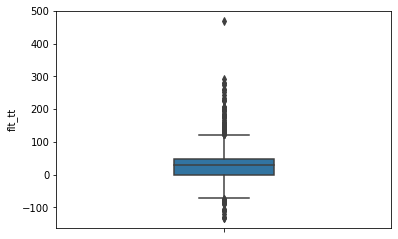

In [655]:
# Explore flt_tt
print(df.flt_tt.describe())
sns.boxplot( y=df['flt_tt'], width=0.3);
plt.show()

count    11892.000000
mean        34.958375
std         31.527233
min          0.000000
25%          0.000000
50%         45.000000
75%         50.000000
max        495.000000
Name: flt_sched_tt, dtype: float64


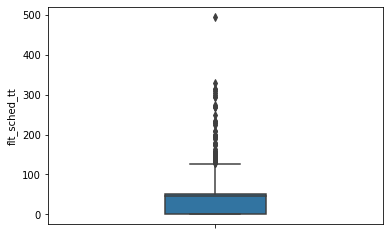

In [656]:
# Explore flt_sched_tt
print(df.flt_sched_tt.describe())
sns.boxplot( y=df['flt_sched_tt'], width=0.3);
plt.show()

In [657]:
# Explore flt_crewg
df.flt_crewg.value_counts(dropna=False)

A        5945
Start    4283
C         746
B         493
B2        425
Name: flt_crewg, dtype: int64

In [658]:
# Explore flt_TLC_trans
# Ensuring that nested lists are stored as such
df['flt_TLC_trans'] = df['flt_TLC_trans'].apply(eval)
df.flt_TLC_trans.describe()	

count                                                 11892
unique                                                11824
top       [Zachary Coleman_64_43_45_ca, Tony Cobb_64_43_...
freq                                                      2
Name: flt_TLC_trans, dtype: object

In [659]:
# Explore flt_crewt_change
df['flt_crewt_change'] = df['flt_crewt_change'].apply(eval)
df.flt_crewt_change.describe()

count     11892
unique       56
top          []
freq       9884
Name: flt_crewt_change, dtype: object

## Exploring Scheduled Groundtime in detail

count    9901.000000
mean       62.862337
std        55.460179
min      -245.000000
25%        45.000000
50%        50.000000
75%        65.000000
max       945.000000
Name: flt_sched_gt, dtype: float64


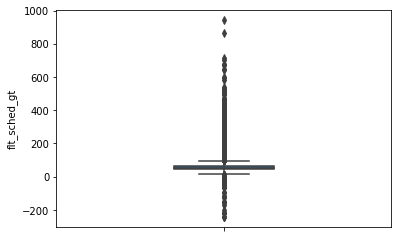

In [660]:
# Explore flt_sched_gt
print(df['flt_sched_gt'].describe())
sns.boxplot(y=df['flt_sched_gt'], width=0.3);
plt.show()

In [661]:
# How many cases have a negative scheduled groundtime?
df[(df['flt_sched_gt'] < 0)].shape

(51, 22)

### Looking at the negative values for flight groundtime

In [662]:
# Identifying a specific aircraft wherer flt_sched_gt < 0 to analyse why there is a negative schedulded gt for a specific date
np.random.seed(42)

indexes = df[(df['flt_sched_gt'] < 0)].index
sample = random.sample(list(indexes), 3)
print(sample)
df[(df['flt_sched_gt'] < 0 )].loc[sample]

[8664, 657, 5787]


,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay
8664,272098780,Kristashire,East Carmen,2019-06-22 18:40:00,2019-06-22 20:36:00,ECLBLX,no reason,0.0,320,54.0,45.0,A,"[Jill Salinas_266_54_45_cp, Anthony Martin_266...",[],-30.0,-1.0,2019-06-22 18:40:00,2019-06-22 20:50:00,NaT,NaT,NaN,-14.0
657,271956496,West Bryanstad,East Carmen,2019-06-02 17:25:00,2019-06-02 18:29:00,ECLBOX,other problem,10.0,320,15.0,45.0,A,"[Robert Thomas_274_15_45_ca, Wesley Moore_274_...",[],-5.0,4.0,2019-06-02 17:15:00,2019-06-02 18:20:00,2019-06-02 17:15:00,2019-06-02 18:20:00,NaN,9.0
5787,272104747,Millerborough,East Carmen,2019-06-15 15:32:00,2019-06-15 17:56:00,ECLWEX,rotational problem,47.0,E95,-3.0,50.0,A,"[David Jones_178_-3_50_ca, Amber Johnston_178_...",[],-150.0,-233.0,2019-06-15 14:45:00,2019-06-15 17:15:00,2019-06-15 14:45:00,2019-06-15 17:15:00,NaN,41.0


In [663]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLWHX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-22')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay
8318,272017746,Stephenstad,East Carmen,2019-06-22 02:30:00,2019-06-22 04:01:00,ECLWHX,no reason,0.0,E95,0.0,0.0,Start,"[Sandra Bolton_nan_nan_nan_cp, Eric Bennett_na...",[],55.0,77.0,2019-06-22 02:30:00,2019-06-22 04:05:00,2019-06-22 02:30:00,2019-06-22 04:05:00,NaN,-4.0
8349,271967973,East Carmen,West Jason,2019-06-22 05:18:00,2019-06-22 06:22:00,ECLWHX,other problem,18.0,E95,0.0,0.0,Start,"[Crystal Hall_nan_nan_nan_ca, Scott Brown_nan_...",[],45.0,29.0,2019-06-22 05:00:00,2019-06-22 06:15:00,2019-06-22 05:00:00,2019-06-22 06:15:00,55.0,7.0
8394,271968183,West Jason,East Carmen,2019-06-22 06:51:00,2019-06-22 08:07:00,ECLWHX,no reason,-9.0,E95,55.0,45.0,A,"[Crystal Hall_27_55_45_ca, Cassandra Nguyen_27...",[],105.0,135.0,2019-06-22 07:00:00,2019-06-22 08:20:00,NaT,NaT,NaN,-13.0
8463,272104737,East Carmen,Vaughnberg,2019-06-22 10:22:00,2019-06-22 12:39:00,ECLWHX,other problem,17.0,E95,0.0,0.0,Start,"[Gregory Brewer_nan_nan_nan_ca, Michael Dean_n...",[],50.0,82.0,2019-06-22 10:05:00,2019-06-22 12:30:00,NaT,NaT,NaN,9.0
8557,272104748,Vaughnberg,Millerborough,2019-06-22 14:01:00,2019-06-22 14:38:00,ECLWHX,rotational problem,41.0,E95,40.0,50.0,A,"[Michael Dean_151_40_50_ca, Gregory Brewer_151...",[],-35.0,52.0,2019-06-22 13:20:00,2019-06-22 13:55:00,NaT,NaT,NaN,43.0
8559,272104749,Millerborough,East Carmen,2019-06-22 15:30:00,2019-06-22 17:58:00,ECLWHX,rotational problem,45.0,E95,40.0,50.0,A,"[Michael Dean_151_40_50_ca, Gregory Brewer_151...",[],-150.0,-148.0,2019-06-22 14:45:00,2019-06-22 17:15:00,2019-06-22 14:45:00,2019-06-22 17:15:00,NaN,43.0
8646,271983677,East Carmen,Davidtown,2019-06-22 18:34:00,2019-06-22 20:12:00,ECLWHX,other problem,19.0,E95,0.0,0.0,Start,"[Shawn Miller_nan_nan_nan_cp, Emily Oconnell_n...",[],NaN,NaN,2019-06-22 18:15:00,2019-06-22 20:10:00,2019-06-22 18:15:00,2019-06-22 20:10:00,60.0,2.0


In [664]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLBNX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-13')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay
4855,272088102,New Stacyburgh,East Michael,2019-06-13 08:55:00,2019-06-13 09:56:00,ECLBNX,other problem,5.0,320,54.0,45.0,A,"[Jillian Benitez_65_54_45_ca, Tony Lloyd_65_54...",[],-55.0,38.0,2019-06-13 08:50:00,2019-06-13 09:45:00,NaT,NaT,NaN,11.0
4858,272088103,East Michael,East Carmen,2019-06-13 10:34:00,2019-06-13 12:21:00,ECLBNX,other problem,4.0,320,54.0,45.0,A,"[Jillian Benitez_65_54_45_ca, Tony Lloyd_65_54...",[],-120.0,-107.0,2019-06-13 10:30:00,2019-06-13 12:30:00,2019-06-13 10:30:00,2019-06-13 12:30:00,NaN,-9.0
4966,272020326,East Carmen,Youngland,2019-06-13 14:51:00,2019-06-13 16:31:00,ECLBNX,technical problem,91.0,320,0.0,0.0,Start,"[Lori Charles_nan_nan_nan_cp, Mark Warren_nan_...",[],45.0,-51.0,2019-06-13 13:20:00,2019-06-13 14:55:00,2019-06-13 13:20:00,2019-06-13 14:55:00,50.0,96.0
5019,272212003,Youngland,East Carmen,2019-06-13 15:40:00,2019-06-13 17:18:00,ECLBNX,no reason,0.0,320,40.0,45.0,A,"[Lindsey Saunders_243_40_45_ca, Justin Li_243_...",[],60.0,76.0,2019-06-13 15:40:00,2019-06-13 17:20:00,2019-06-13 15:40:00,2019-06-13 17:20:00,NaN,-2.0
5081,272015362,East Carmen,Port Maryside,2019-06-13 18:34:00,2019-06-13 19:35:00,ECLBNX,other problem,14.0,320,55.0,60.0,A,"[Justin Li_299_55_60_ca, Zachary Smith_299_55_...","[ca, ca, ca, cp]",NaN,NaN,2019-06-13 18:20:00,2019-06-13 19:30:00,2019-06-13 18:20:00,2019-06-13 19:30:00,60.0,5.0


In [665]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLBSX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-22')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay
8330,272101092,East Carmen,Weeksbury,2019-06-22 04:27:00,2019-06-22 06:20:00,ECLBSX,other problem,22.0,320,0.0,0.0,Start,"[Robert Goodwin_nan_nan_nan_ca, Keith Henson_n...",[],45.0,42.0,2019-06-22 04:05:00,2019-06-22 06:05:00,NaT,NaT,NaN,15.0
8391,272101122,Weeksbury,East Carmen,2019-06-22 07:02:00,2019-06-22 08:58:00,ECLBSX,other problem,12.0,320,52.0,45.0,A,"[Robert Goodwin_18_52_45_ca, Arthur Ray_18_52_...",[],60.0,74.0,2019-06-22 06:50:00,2019-06-22 08:55:00,2019-06-22 06:50:00,2019-06-22 08:55:00,NaN,3.0
8462,272101618,East Carmen,North Stephenville,2019-06-22 10:12:00,2019-06-22 12:24:00,ECLBSX,other problem,17.0,320,0.0,0.0,Start,"[Catherine Taylor_nan_nan_nan_ca, Samantha Huf...",[],50.0,92.0,2019-06-22 09:55:00,2019-06-22 12:25:00,2019-06-22 09:55:00,2019-06-22 12:25:00,60.0,-1.0
8554,272101046,North Stephenville,East Allisontown,2019-06-22 13:56:00,2019-06-22 16:21:00,ECLBSX,rotational problem,41.0,320,25.0,50.0,A,"[Christina Hernandez_153_25_50_cp, Thomas Garc...",[],45.0,6.0,2019-06-22 13:15:00,2019-06-22 15:40:00,NaT,NaT,NaN,41.0
8612,272218013,East Allisontown,Aaronbury,2019-06-22 16:27:00,2019-06-22 17:04:00,ECLBSX,other problem,2.0,320,23.0,45.0,A,"[Christina Hernandez_227_23_45_cp, Michael Coo...",[],-40.0,54.0,2019-06-22 16:25:00,2019-06-22 17:05:00,NaT,NaT,NaN,-1.0
8613,272101014,Aaronbury,North Stephenville,2019-06-22 17:58:00,2019-06-22 20:24:00,ECLBSX,other problem,3.0,320,23.0,45.0,A,"[Christina Hernandez_227_23_45_cp, Michael Coo...",[],-155.0,-149.0,2019-06-22 17:55:00,2019-06-22 20:30:00,NaT,NaT,NaN,-6.0
8679,272101645,North Stephenville,East Carmen,2019-06-22 21:36:00,2019-06-22 23:59:00,ECLBSX,other problem,16.0,320,25.0,50.0,A,"[Matthew Rodgers_323_25_50_ca, Shari Johnson_3...",[],NaN,NaN,2019-06-22 21:20:00,2019-06-22 23:55:00,NaT,NaT,NaN,4.0


After analysing this sample it seems that the routings are generally ok. However, the sched ground times seem to be not calculated correctly. Therefore an algorithm will be implemented to check the validity of the routing and if that is ok, the sched. and act. gt will be calculated. If routing is nok, than NaN will be set for both variables.

In [666]:
# Sort values based on registration and scheduled departure date.
df.sort_values(by=['flt_ac_reg', 'flt_sched_dep'], inplace=True)

# Create new variable to check for consistent routing.
df['routing'] = np.where((df['flt_ac_reg'] == df['flt_ac_reg'].shift(-1)) & (df['flt_arr_airpt'] == df['flt_dep_airpt'].shift(-1))
    & (df['flt_sched_dep'].dt.date == df['flt_sched_dep'].shift(-1).dt.date), True, False)

# Recalculate scheduled and actual groundtime.
df['sched_gt'] = np.where(df['routing'] == True, (df['flt_sched_dep'].shift(-1) - df['flt_sched_arr']) / pd.Timedelta(minutes=1), np.nan)
df['act_gt'] = np.where(df['routing'] == True, (df['flt_offblock'].shift(-1) - df['flt_onblock']) / pd.Timedelta(minutes=1), np.nan)

In [667]:
# Check how many cases that has cured
df[(df['flt_sched_gt'] < 0) & (df['sched_gt'] > 0)].shape

(33, 25)

In [668]:
# Store ac resgistration and sched dep date of all scheduling mistakes in extra dataframe
sched_help = df[(df['sched_gt'] < 0)][['flt_ac_reg', 'flt_sched_dep']]
sched_help['flt_sched_dep_d'] = sched_help['flt_sched_dep'].dt.date

# Create date column in df to be able to join with the above.
df['sched_dep_d'] = df['flt_sched_dep'].dt.date

In [669]:
# Create a dataframe with all aircraft registrations and their rotation for the days with a scheduling mistake and export it.
sched_mistake = df.merge(sched_help, how='inner', left_on=['flt_ac_reg', 'sched_dep_d'], right_on=['flt_ac_reg', 'flt_sched_dep_d'])
sched_mistake.to_csv('../data/interim/sched_mistake.csv')

# Clear dataframe by all aircraft and days with a scheduling mistake.
df = df.merge(sched_help, how='outer', left_on=['flt_ac_reg', 'sched_dep_d'], right_on=['flt_ac_reg', 'flt_sched_dep_d'], indicator='i')
df = df[df['i'] == 'left_only']
df = df.drop(columns=['flt_sched_gt', 'flt_sched_dep_y', 'flt_sched_dep_d', 'i'])
df.rename(columns={'flt_sched_dep_x': 'flt_sched_dep'}, inplace=True)

count    9722.000000
mean       63.305904
std        53.365394
min         0.000000
25%        45.000000
50%        50.000000
75%        65.000000
max       945.000000
Name: sched_gt, dtype: float64


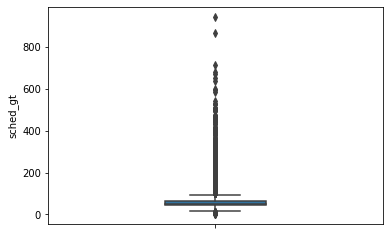

In [670]:

# Explore flt_sched_gt
print(df['sched_gt'].describe())
sns.boxplot(y=df['sched_gt'], width=0.3);
plt.show()

### Looking at the higher values for scheduled groundtime

In [671]:
# Having a detailed look at a sample of values that are larger than 10 hours of groundtime
np.random.seed(42)

indexes = df[(df['sched_gt'] > 600)].index
sample = random.sample(list(indexes), 3)
print(sample)
df[(df['sched_gt'] > 600 )].loc[sample]

[7507, 943, 5487]


,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay,routing,sched_gt,act_gt,sched_dep_d
7507,272033742,Port Courtneytown,East Carmen,2019-06-23 04:01:00,2019-06-23 04:43:00,ECLGQX,other problem,1.0,DH4,0.0,0.0,Start,"[Bruce Montoya_nan_nan_nan_cp, Heather Ryan_na...",[],732.0,2019-06-23 04:00:00,2019-06-23 04:35:00,NaT,NaT,NaN,8.0,True,670.0,732.0,2019-06-23
943,272016398,Youngland,East Carmen,2019-06-09 04:57:00,2019-06-09 06:32:00,ECLBIX,other problem,2.0,320,0.0,0.0,Start,"[Katherine Hicks_nan_nan_nan_ca, Jennifer Adam...",[],744.0,2019-06-09 04:55:00,2019-06-09 06:40:00,NaT,NaT,NaN,-8.0,True,715.0,744.0,2019-06-09
5487,271984540,Port Ryan,East Carmen,2019-06-07 02:24:00,2019-06-07 03:57:00,ECLGCX,other problem,4.0,DH4,0.0,0.0,Start,"[Sean Merritt_nan_nan_nan_ca, Natalie Anderson...",[],701.0,2019-06-07 02:20:00,2019-06-07 03:50:00,NaT,NaT,NaN,7.0,True,680.0,701.0,2019-06-07


In [672]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLBIX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-09')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay,routing,sched_gt,act_gt,sched_dep_d
943,272016398,Youngland,East Carmen,2019-06-09 04:57:00,2019-06-09 06:32:00,ECLBIX,other problem,2.0,320,0.0,0.0,Start,"[Katherine Hicks_nan_nan_nan_ca, Jennifer Adam...",[],744.0,2019-06-09 04:55:00,2019-06-09 06:40:00,NaT,NaT,NaN,-8.0,True,715.0,744.0,2019-06-09
944,272024791,East Carmen,New Jessica,2019-06-09 18:56:00,2019-06-09 21:53:00,ECLBIX,other problem,21.0,320,52.0,55.0,B,"[Joseph Moore_283_52_55_ca, Matthew Alvarez_28...",[],NaN,2019-06-09 18:35:00,2019-06-09 21:40:00,NaT,NaT,NaN,13.0,False,NaN,NaN,2019-06-09


In [673]:
# Looking at the  rotation of the second registration for the specific day
df[(df['flt_ac_reg'] == 'ECLGCX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-07')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay,routing,sched_gt,act_gt,sched_dep_d
5487,271984540,Port Ryan,East Carmen,2019-06-07 02:24:00,2019-06-07 03:57:00,ECLGCX,other problem,4.0,DH4,0.0,0.0,Start,"[Sean Merritt_nan_nan_nan_ca, Natalie Anderson...",[],701.0,2019-06-07 02:20:00,2019-06-07 03:50:00,NaT,NaT,NaN,7.0,True,680.0,701.0,2019-06-07
5488,272010498,East Carmen,North Anna,2019-06-07 15:38:00,2019-06-07 16:29:00,ECLGCX,rotational problem,28.0,DH4,0.0,0.0,Start,"[Abigail Garcia_nan_nan_nan_cp, William Lane_n...",[],15.0,2019-06-07 15:10:00,2019-06-07 16:00:00,NaT,NaT,NaN,29.0,True,40.0,15.0,2019-06-07
5489,272010708,North Anna,East Carmen,2019-06-07 16:44:00,2019-06-07 17:38:00,ECLGCX,other problem,4.0,DH4,-129.0,40.0,A,"[Anthony Warren_343_-129_40_ca, Abigail Garcia...",[],70.0,2019-06-07 16:40:00,2019-06-07 17:35:00,2019-06-07 16:40:00,2019-06-07 17:35:00,NaN,3.0,True,55.0,70.0,2019-06-07
5490,272170912,East Carmen,Haynesside,2019-06-07 18:48:00,2019-06-07 19:50:00,ECLGCX,other problem,18.0,DH4,-108.0,55.0,A,"[Anthony Warren_382_-108_55_ca, Sara Myers_382...",[],NaN,2019-06-07 18:30:00,2019-06-07 19:35:00,2019-06-07 18:30:00,2019-06-07 19:35:00,55.0,15.0,False,NaN,NaN,2019-06-07


In [674]:
# Looking at the  rotation of the third registration for the specific day
df[(df['flt_ac_reg'] == 'ECLGCX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-30')]
# As all large scheduled groundtimes seem to be correct there will be no additional corrective action for now.

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay,routing,sched_gt,act_gt,sched_dep_d
5603,272203484,Lake David,East Carmen,2019-06-30 02:12:00,2019-06-30 04:25:00,ECLGCX,other problem,2.0,DH4,0.0,0.0,Start,"[Christine Ramirez_nan_nan_nan_ca, Laurie Shah...",[],947.0,2019-06-30 02:10:00,2019-06-30 04:10:00,NaT,NaT,NaN,15.0,True,945.0,947.0,2019-06-30
5604,272031563,East Carmen,Lake Richardberg,2019-06-30 20:12:00,2019-06-30 21:00:00,ECLGCX,other problem,17.0,DH4,4.0,50.0,C,"[Matthew Harper_335_4_50_cp, Samuel Levine_302...","[cp, cp, ca]",NaN,2019-06-30 19:55:00,2019-06-30 20:45:00,NaT,NaT,NaN,15.0,False,NaN,NaN,2019-06-30


count    9722.000000
mean       67.045258
std        67.506722
min      -128.000000
25%        34.000000
50%        60.000000
75%        87.000000
max       947.000000
Name: act_gt, dtype: float64


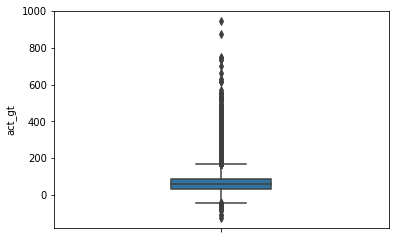

In [675]:
# Explore act_gt
print(df['act_gt'].describe())
sns.boxplot(y=df['act_gt'], width=0.3);
plt.show()

In [676]:
# How many cases have a negative actual groundtime?
df[(df['act_gt'] < 0)].shape

(900, 25)

In [677]:
# Identifying a specific aircraft wherer flt_sched_gt < 0 to analyse why there is a negative schedulded gt for a specific date
np.random.seed(42)

indexes = df[(df['act_gt'] < 0)].index
sample = random.sample(list(indexes), 3)
print(sample)
df[(df['act_gt'] < 0 )].loc[sample]

[5176, 5458, 11120]


,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay,routing,sched_gt,act_gt,sched_dep_d
5176,272031964,East Carmen,Lake Richardberg,2019-06-13 16:12:00,2019-06-13 16:59:00,ECLGAX,rotational problem,62.0,DH4,40.0,55.0,C,"[Natalie Anderson_nan_nan_nan_cp, Mark Gross_2...","[ca, cp]",-20.0,2019-06-13 15:10:00,2019-06-13 16:00:00,2019-06-13 15:10:00,2019-06-13 16:00:00,35.0,59.0,True,30.0,-20.0,2019-06-13
5458,272010521,East Carmen,North Anna,2019-06-30 16:38:00,2019-06-30 17:27:00,ECLGBX,technical problem,88.0,DH4,46.0,50.0,C,"[Mary Curtis_214_60_55_cp, Erin Robinson_nan_n...",[cp],-45.0,2019-06-30 15:10:00,2019-06-30 16:00:00,NaT,NaT,NaN,87.0,True,40.0,-45.0,2019-06-30
11120,272182692,Yoderburgh,East Carmen,2019-06-20 17:41:00,2019-06-20 19:23:00,ECLXAX,rotational problem,51.0,320,14.0,45.0,A,"[Susan Olson_253_14_45_ca, Jared Rollins_253_1...",[],-32.0,2019-06-20 16:50:00,2019-06-20 18:25:00,2019-06-20 16:50:00,2019-06-20 18:25:00,NaN,58.0,True,15.0,-32.0,2019-06-20


In [678]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLGGX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-09')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay,routing,sched_gt,act_gt,sched_dep_d
5839,272001204,North Christopherburgh,East Carmen,2019-06-09 05:35:00,2019-06-09 06:32:00,ECLGGX,other problem,20.0,DH4,0.0,0.0,Start,"[Michael Alexander_nan_nan_nan_cp, Christopher...",[],311.0,2019-06-09 05:15:00,2019-06-09 06:15:00,NaT,NaT,NaN,17.0,True,295.0,311.0,2019-06-09
5840,272206234,East Carmen,Keithberg,2019-06-09 11:43:00,2019-06-09 12:33:00,ECLGGX,other problem,33.0,DH4,53.0,55.0,C,"[Robert Wilson_nan_nan_nan_ca, Albert Watson_n...",[cp],120.0,2019-06-09 11:10:00,2019-06-09 12:05:00,NaT,NaT,NaN,28.0,True,80.0,120.0,2019-06-09
5841,272008373,Keithberg,East Carmen,2019-06-09 14:33:00,2019-06-09 15:29:00,ECLGGX,rotational problem,68.0,DH4,65.0,80.0,A,"[Mary Curtis_185_65_80_cp, Albert Watson_185_6...",[],55.0,2019-06-09 13:25:00,2019-06-09 14:15:00,2019-06-09 13:25:00,2019-06-09 14:15:00,NaN,74.0,True,70.0,55.0,2019-06-09
5842,271967332,East Carmen,Lake Danielburgh,2019-06-09 16:24:00,2019-06-09 17:41:00,ECLGGX,rotational problem,59.0,DH4,70.0,65.0,B,"[Christine Elliott_219_70_65_ca, Michele Salin...",[],-21.0,2019-06-09 15:25:00,2019-06-09 16:45:00,2019-06-09 15:25:00,2019-06-09 16:45:00,70.0,56.0,True,35.0,-21.0,2019-06-09
5843,271967510,Lake Danielburgh,East Carmen,2019-06-09 17:20:00,2019-06-09 18:28:00,ECLGGX,no reason,0.0,DH4,35.0,35.0,A,"[Katherine Porter_263_35_35_ca, Michele Salina...",[],78.0,2019-06-09 17:20:00,2019-06-09 18:35:00,2019-06-09 17:20:00,2019-06-09 18:35:00,NaN,-7.0,True,50.0,78.0,2019-06-09
5844,272011727,East Carmen,Lake Kevin,2019-06-09 19:46:00,2019-06-09 20:28:00,ECLGGX,other problem,21.0,DH4,60.0,50.0,A,"[George Baker_306_60_50_cp, Michele Salinas_30...",[],NaN,2019-06-09 19:25:00,2019-06-09 20:15:00,2019-06-09 19:25:00,2019-06-09 20:15:00,50.0,13.0,False,NaN,NaN,2019-06-09


In [679]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLXAX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-20')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay,routing,sched_gt,act_gt,sched_dep_d
11114,272339412,West Bryanstad,East Carmen,2019-06-20 05:34:00,2019-06-20 06:30:00,ECLXAX,other problem,14.0,320,0.0,0.0,Start,"[Anita Austin_nan_nan_nan_cp, Randy Wilson_nan...",[],67.0,2019-06-20 05:20:00,2019-06-20 06:25:00,2019-06-20 05:20:00,2019-06-20 06:25:00,NaN,5.0,True,55.0,67.0,2019-06-20
11115,272338307,East Carmen,West Bryanstad,2019-06-20 07:37:00,2019-06-20 08:36:00,ECLXAX,other problem,17.0,320,62.0,55.0,A,"[Patricia Watson_43_62_55_ca, Anita Austin_43_...",[],46.0,2019-06-20 07:20:00,2019-06-20 08:20:00,2019-06-20 07:20:00,2019-06-20 08:20:00,55.0,16.0,True,60.0,46.0,2019-06-20
11116,272338486,West Bryanstad,East Carmen,2019-06-20 09:22:00,2019-06-20 10:26:00,ECLXAX,other problem,2.0,320,58.0,60.0,A,"[Patricia Watson_81_58_60_ca, Anita Austin_81_...",[],74.0,2019-06-20 09:20:00,2019-06-20 10:25:00,2019-06-20 09:20:00,2019-06-20 10:25:00,NaN,1.0,True,50.0,74.0,2019-06-20
11117,272338665,East Carmen,West Bryanstad,2019-06-20 11:40:00,2019-06-20 12:32:00,ECLXAX,other problem,25.0,320,38.0,50.0,C,"[Shari Williams_104_65_75_cp, Tonya Campbell_1...",[cp],77.0,2019-06-20 11:15:00,2019-06-20 12:15:00,2019-06-20 11:15:00,2019-06-20 12:15:00,50.0,17.0,True,45.0,77.0,2019-06-20
11118,272338843,West Bryanstad,East Carmen,2019-06-20 13:49:00,2019-06-20 14:51:00,ECLXAX,rotational problem,49.0,320,0.0,0.0,Start,"[Jonathan Hill_nan_nan_nan_cp, Brenda Wilson_n...",[],9.0,2019-06-20 13:00:00,2019-06-20 14:05:00,2019-06-20 13:00:00,2019-06-20 14:05:00,NaN,46.0,True,25.0,9.0,2019-06-20
11119,271961369,East Carmen,Yoderburgh,2019-06-20 15:00:00,2019-06-20 16:39:00,ECLXAX,rotational problem,30.0,320,0.0,0.0,Start,"[Jared Rollins_nan_nan_nan_ca, Kenneth Craig_n...",[],62.0,2019-06-20 14:30:00,2019-06-20 16:05:00,2019-06-20 14:30:00,2019-06-20 16:05:00,25.0,34.0,True,45.0,62.0,2019-06-20
11120,272182692,Yoderburgh,East Carmen,2019-06-20 17:41:00,2019-06-20 19:23:00,ECLXAX,rotational problem,51.0,320,14.0,45.0,A,"[Susan Olson_253_14_45_ca, Jared Rollins_253_1...",[],-32.0,2019-06-20 16:50:00,2019-06-20 18:25:00,2019-06-20 16:50:00,2019-06-20 18:25:00,NaN,58.0,True,15.0,-32.0,2019-06-20
11121,272206867,East Carmen,Port Bobby,2019-06-20 18:51:00,2019-06-20 20:40:00,ECLXAX,other problem,11.0,320,0.0,0.0,Start,"[Harold Odom_nan_nan_nan_ca, Christine Tran_na...",[],NaN,2019-06-20 18:40:00,2019-06-20 20:30:00,2019-06-20 18:40:00,2019-06-20 20:30:00,15.0,10.0,False,NaN,NaN,2019-06-20


In [680]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLGQX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-07')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay,routing,sched_gt,act_gt,sched_dep_d
7439,272032546,Port Courtneytown,East Carmen,2019-06-07 06:15:00,2019-06-07 07:09:00,ECLGQX,no reason,0.0,DH4,0.0,0.0,Start,"[Joshua Henderson_nan_nan_nan_ca, George Pache...",[],134.0,2019-06-07 06:15:00,2019-06-07 07:00:00,2019-06-07 06:15:00,2019-06-07 07:00:00,NaN,9.0,True,45.0,134.0,2019-06-07
7440,272029870,East Carmen,Fisherhaven,2019-06-07 09:23:00,2019-06-07 10:21:00,ECLGQX,technical problem,98.0,DH4,122.0,120.0,C,"[William Noble_nan_nan_nan_ca, Joseph Banks_na...",[cp],6.0,2019-06-07 07:45:00,2019-06-07 08:40:00,2019-06-07 07:45:00,2019-06-07 08:40:00,45.0,101.0,True,30.0,6.0,2019-06-07
7441,272030056,Fisherhaven,East Carmen,2019-06-07 10:27:00,2019-06-07 11:21:00,ECLGQX,technical problem,77.0,DH4,16.0,30.0,A,"[Aaron Edwards_nan_nan_nan_ca, Melissa Key_100...","[cp, ca]",40.0,2019-06-07 09:10:00,2019-06-07 10:15:00,2019-06-07 09:10:00,2019-06-07 10:15:00,NaN,66.0,True,45.0,40.0,2019-06-07
7442,271984078,East Carmen,Port Ryan,2019-06-07 12:01:00,2019-06-07 13:17:00,ECLGQX,technical problem,61.0,DH4,0.0,0.0,Start,"[Richard Stein_nan_nan_nan_ca, Kim Hawkins_nan...",[],-9.0,2019-06-07 11:00:00,2019-06-07 12:20:00,2019-06-07 11:00:00,2019-06-07 12:20:00,45.0,57.0,True,40.0,-9.0,2019-06-07
7443,271984284,Port Ryan,East Carmen,2019-06-07 13:08:00,2019-06-07 14:32:00,ECLGQX,other problem,8.0,DH4,33.0,40.0,A,"[Tony Wood_186_33_40_ca, Kim Hawkins_186_33_40...",[],111.0,2019-06-07 13:00:00,2019-06-07 14:35:00,2019-06-07 13:00:00,2019-06-07 14:35:00,NaN,-3.0,True,40.0,111.0,2019-06-07
7444,272007432,East Carmen,Keithberg,2019-06-07 16:23:00,2019-06-07 17:07:00,ECLGQX,technical problem,68.0,DH4,52.0,40.0,A,"[Janice Vasquez_227_52_40_cp, Kim Hawkins_227_...","[cp, cp, ca]",66.0,2019-06-07 15:15:00,2019-06-07 16:05:00,2019-06-07 15:15:00,2019-06-07 16:05:00,40.0,62.0,True,40.0,66.0,2019-06-07
7445,272205683,Keithberg,East Carmen,2019-06-07 18:13:00,2019-06-07 19:00:00,ECLGQX,technical problem,88.0,DH4,43.0,40.0,A,"[Janice Vasquez_275_43_40_cp, Brian Johnson_27...",[],-14.0,2019-06-07 16:45:00,2019-06-07 17:40:00,2019-06-07 16:45:00,2019-06-07 17:40:00,NaN,80.0,True,45.0,-14.0,2019-06-07
7446,272000993,East Carmen,North Christopherburgh,2019-06-07 18:46:00,2019-06-07 19:43:00,ECLGQX,technical problem,21.0,DH4,52.0,45.0,A,"[Janice Vasquez_321_52_45_cp, Brian Johnson_32...",[],NaN,2019-06-07 18:25:00,2019-06-07 19:25:00,2019-06-07 18:25:00,2019-06-07 19:25:00,45.0,18.0,False,NaN,NaN,2019-06-07


In [685]:
# Store ac resgistration and sched dep date of all scheduling mistakes in extra dataframe
act_help = df[(df['act_gt'] < 0)][['flt_ac_reg', 'flt_sched_dep']]
act_help['flt_sched_dep_d'] = act_help['flt_sched_dep'].dt.date
act_help

,flt_ac_reg,flt_sched_dep,flt_sched_dep_d
150,ECLBBX,2019-06-01 04:30:00,2019-06-01
153,ECLBBX,2019-06-01 13:50:00,2019-06-01
166,ECLBBX,2019-06-03 15:15:00,2019-06-03
168,ECLBBX,2019-06-04 04:30:00,2019-06-04
178,ECLBBX,2019-06-05 15:10:00,2019-06-05
...,...,...,...
11364,ECLXBX,2019-06-30 08:15:00,2019-06-30
11366,ECLXBX,2019-06-30 13:00:00,2019-06-30
11454,ECLXCX,2019-06-14 15:35:00,2019-06-14
11505,ECLXCX,2019-06-24 13:20:00,2019-06-24


In [686]:
# Create a dataframe with all aircraft registrations and their rotation for the days with a actual mistake and export it.
act_mistake = df.merge(act_help, how='inner', left_on=['flt_ac_reg', 'sched_dep_d'], right_on=['flt_ac_reg', 'flt_sched_dep_d'])
act_mistake.to_csv('../data/interim/act_mistake.csv')

act_mistake.shape

# Clear dataframe by all aircraft and days with a scheduling mistake.
#df = df.merge(sched_help, how='outer', left_on=['flt_ac_reg', 'sched_dep_d'], right_on=['flt_ac_reg', 'flt_sched_dep_d'], indicator='i')
#df = df[df['i'] == 'left_only']
#df = df.drop(columns=['flt_sched_gt', 'flt_sched_dep_y', 'flt_sched_dep_d', 'i'])
#df.rename(columns={'flt_sched_dep_x': 'flt_sched_dep'}, inplace=True)

(5857, 27)

In [161]:
# Check mismatches in sched dep between flight data and ground data
sched_dep_mismatch = df[df.gnd_sched_dep.notna() & (df['flt_sched_dep'].astype(str) != df['gnd_sched_dep'].astype(str))]
sched_dep_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay


In [162]:
# Drop gnd_sched_dep as all information is already contained in flt_sched_dep; create new feature for day of the week and hour of the day
df = df.drop(columns='gnd_sched_dep')

In [163]:
# Check mismatches in sched dep  between flight data and ground data
sched_arr_mismatch = df[df.gnd_sched_arr.notna() & (df['flt_sched_arr'].astype(str) != df['gnd_sched_arr'].astype(str))]
sched_arr_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_arr,gnd_sched_tat,arr_delay


In [164]:
# Drop gnd_sched_arr as all information is already contained in flt_sched_arr; create new feature for hour of the day
df = df.drop(columns='gnd_sched_arr')

In [165]:
df.to_csv('../data/interim/cleaned.csv')
df.to_pickle('../data/interim/cleaned.pkl')